# Data Loading and understanding the Data

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [283]:
df = pd.read_csv('/content/data.csv')

In [284]:
df.head()

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Issue,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rated 5 out of 5 stars,Love digital banking,Love digital banking I keep now all my busines...,"Feb 1, 2024","February 01, 2024",5,2024,2024,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rated 3 out of 5 stars,Poor support and no wires,"A decent basic free business bank, but have re...","Feb 8, 2024","February 07, 2024",3,2024,2024,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rated 4 out of 5 stars,Really easy to set up,Really easy to set up. Works as intended most ...,"Jan 10, 2024","January 10, 2024",4,2024,2024,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
df = df[['rating','rating title','Review text','Review date','Date of Experience','rating_procesed','Year of review ','Year of experience','DIff in months ']]

In [286]:
df.head(2)

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0


In [287]:
df.shape

(3472, 9)

In [288]:
df['rating'].value_counts()

rating
Rated 5 out of 5 stars    2624
Rated 1 out of 5 stars     549
Rated 4 out of 5 stars     144
Rated 2 out of 5 stars      96
Rated 3 out of 5 stars      59
Name: count, dtype: int64

# Data Visulisation

In [289]:
issues = df['Review text'].tolist()

In [290]:
issues

['It was easy to set up, with no hassle like some other banks. Making name, EIN, and other changes later was easy as well and the support team was courteous and efficient. I highly recommend Novo online bank for your company banking.',
 'Unfortunately I’m probably going to figure out a new business banking solution. Super easy to set up and the feature set is good. There haven’t been many bugs but the ones I’ve had have all been important:1. Bank goes offline for hours without so much as a message about it.2. I send a client an invoice. Client clicks on the download pdf and gets an error. Asks me for a pdf and I get the same error.3. Scheduled invoices did not send.Customer service is lackluster at best.',
 "Love digital banking I keep now all my business accounts digitally. Novo is wonderful. My husband also has his business account with Novo. We're a Novo family. Highly recommend",
 'A decent basic free business bank, but have regular issues with vendors being flagged as fraud (decli

In [291]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(issues)

In [292]:
# Apply K-Means clustering
num_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [293]:
# Get the top terms for each cluster
def get_top_terms_per_cluster(kmeans, vectorizer, n_terms=8):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_terms = []
    for i in range(kmeans.n_clusters):
        cluster_terms.append([terms[ind] for ind in order_centroids[i, :n_terms]])
    return cluster_terms

In [294]:
top_terms = get_top_terms_per_cluster(kmeans, vectorizer)
for i, terms in enumerate(top_terms):
    print(f"Cluster {i}: {', '.join(terms)}")


Cluster 0: novo, bank, business, love, great, banking, experience, app
Cluster 1: easy, use, great, novo, business, app, love, banking
Cluster 2: account, bank, card, money, novo, business, days, support
Cluster 3: business, small, banking, novo, great, bank, love, recommend
Cluster 4: service, customer, great, novo, excellent, easy, good, use


In [295]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [296]:
# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42,init="random")
X_tsne = tsne.fit_transform(X)

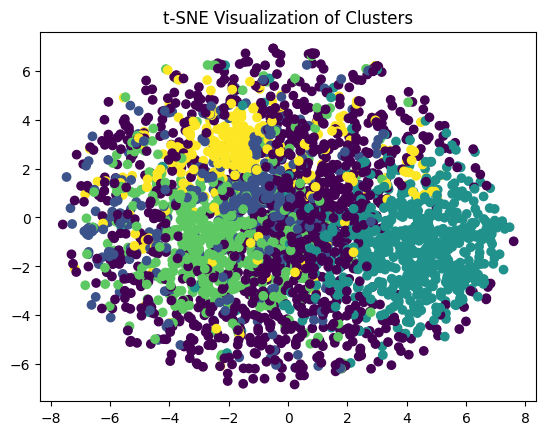

In [297]:
# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title("t-SNE Visualization of Clusters")
plt.show()

## Using Transfer Learning

In [298]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, random_split

In [299]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_clusters)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [300]:
# Tokenize the text data
inputs = tokenizer(issues, padding=True, truncation=True, return_tensors='pt')

In [301]:
import torch

In [302]:
# Create a dataset and data loader
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], torch.tensor(cluster_labels))
train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = random_split(dataset, [train_size, len(dataset) - train_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [303]:
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Using Topic Modelling to get high Level and Low level labels for the data

In [304]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

In [305]:
reviews = df['Review text'].values

In [306]:
# Preprocess the text (tokenization, removing stopwords, etc.)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(reviews)

### Finding High level labels

In [307]:
from sklearn.decomposition import LatentDirichletAllocation

In [308]:
# Fit LDA model
num_topics = 10  # Define the number of high-level topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
X_topics = lda.fit_transform(X)

In [309]:
# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names, 10)
print(top_words)

[['good', 'great', 'novo', 'forward', 'easy', 'use', 'quick', 'business', 'bank', 'service'], ['helped', 'date', 'clients', 'tracking', 'choice', 'sailing', 'legit', 'pay', 'connections', 'operate'], ['breeze', 'trouble', 'incredibly', 'terrific', 'payroll', 'frills', 'innovating', 'loans', 'sell', 'addition'], ['phenomenal', 'capabilities', 'knowledgeable', 'saves', 'turnaround', 'forgiven', 'compliment', 'worth', 'polite', 'packed'], ['minimal', 'functional', 'maneuver', 'beautiful', 'todays', 'practical', 'elegant', 'man', 'ooh', 'december'], ['business', 'novo', 'loan', 'enjoyed', 'small', 'banking', 'easy', 'great', 'application', 'ppp'], ['business', 'novo', 'easy', 'great', 'banking', 'small', 'use', 'love', 'bank', 'service'], ['secure', 'capital', 'cost', 'low', 'establish', 'headaches', 'totally', 'methods', 'regret', 'solves'], ['alternative', 'transparent', 'stress', 'easiest', 'main', 'ideal', 'refer', 'effectively', 'enroll', 'annoying'], ['account', 'bank', 'card', 'mone

## Clustering for subtopics

In [310]:
from sklearn.cluster import KMeans

# Perform clustering within each topic
num_subtopics = 3  # Define the number of subtopics per topic
subtopic_labels = []

In [311]:
for topic_idx in range(num_topics):
    topic_reviews = X_topics[:, topic_idx]
    topic_indices = topic_reviews.argsort()[-500:]  # Get top 500 reviews for the topic
    topic_data = X[topic_indices]
    kmeans = KMeans(n_clusters=num_subtopics, random_state=42)
    subtopic_label = kmeans.fit_predict(topic_data)
    subtopic_labels.append(subtopic_label)

In [312]:
print(subtopic_labels)

[array([2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0,
       2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1,
       1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2,
       0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0

In [313]:
# Perform clustering within each topic
num_subtopics = 2  # Define the number of subtopics per topic
subtopic_labels = []

# Initialize a list to store all topic indices for mapping later
all_topic_indices = []

for topic_idx in range(num_topics):
    topic_reviews = X_topics[:, topic_idx]
    topic_indices = topic_reviews.argsort()[-(len(reviews) // num_topics):]  # Get top indices for the topic
    all_topic_indices.append(topic_indices)  # Collect all topic indices

    topic_data = X[topic_indices]
    kmeans = KMeans(n_clusters=num_subtopics, random_state=42)
    subtopic_label = kmeans.fit_predict(topic_data)
    subtopic_labels.append(subtopic_label)

# Flatten the list of topic indices
flat_topic_indices = [idx for sublist in all_topic_indices for idx in sublist]

# Map subtopics to original reviews
review_subtopic_labels = [-1] * len(reviews)
for topic_idx, indices in enumerate(all_topic_indices):
    for i, review_idx in enumerate(indices):
        review_subtopic_labels[review_idx] = subtopic_labels[topic_idx][i]

# Print the resulting labels
print("Review Subtopic Labels:")
print(review_subtopic_labels)

Review Subtopic Labels:
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, -1, 0, -1, 0, 1, -1, 0, 0, 1, 0, 1, -1, -1, 1, 1, -1, -1, 0, 0, 1, 1, -1, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, -1, -1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, -1, 1, 1, 1, 0, -1, 1, 0, -1, -1, -1, -1, 1, 1, 1, 0, -1, -1, -1, 1, 0, 0, -1, 0, -1, 1, -1, -1, 0, -1, -1, 0, -1, 0, -1, 0, -1, -1, 0, -1, 0, -1, 1, 0, 0, 0, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, 1, 0, -1, 1, 0, 0, 1, -1, 0, -1, 0, 1, 1, 0, -1, -1, 1, 0, 1, 0, 0, -1, 0, -1, 0, 0, 0, -1, -1, 1, -1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, -1, -1, 0, 0, 0, 1, 0, 1, -1, 1, 1, 0, 0, -1, -1, 1, -1, 1, -1, -1, 1, -1, 0, 0, -1, 1, -1, -1, 1, -1, 0, 1, -1, -1, 0, 1, -1, 0, -1, -1, 0, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 0, 0, 1, 1, 0, 1, 0, 1, -1, 1, 1, 0, -1, 0, 1, 0, 0, 1, 0, -1, 0, 0, 0, 0, -1, -1, 1, -1, 0, -1, 1, -1, -1, 0, -1, 0, 0, -1, 1, 0, 0, 0, 1, 0, 1, 1, 1, -1, -1, 0, -1, -1, 1, -1, 0, -1, -1, 1, -1, 0, 0, 1, 1, -1, 0, -1, -1, 

In [314]:
# Combine topic and subtopic labels
hierarchical_labels = []
for i in range(len(reviews)):
    main_topic = np.argmax(X_topics[i])
    subtopic = review_subtopic_labels[i]
    hierarchical_labels.append((main_topic, subtopic))

In [315]:
hierarchical_labels

[(6, 1),
 (9, 0),
 (6, 0),
 (9, 1),
 (9, 1),
 (6, 1),
 (9, 0),
 (6, 1),
 (6, 0),
 (6, 0),
 (6, 0),
 (6, -1),
 (9, 0),
 (6, -1),
 (9, 0),
 (9, 1),
 (6, -1),
 (6, 0),
 (6, 0),
 (6, 1),
 (6, 0),
 (6, 1),
 (9, -1),
 (6, -1),
 (6, 1),
 (6, 1),
 (6, -1),
 (6, -1),
 (9, 0),
 (9, 0),
 (5, 1),
 (6, 1),
 (6, -1),
 (6, 0),
 (6, 0),
 (6, 0),
 (6, 0),
 (6, 0),
 (9, 0),
 (6, -1),
 (2, 0),
 (6, -1),
 (6, 0),
 (9, -1),
 (6, -1),
 (9, 0),
 (6, 1),
 (6, 1),
 (6, 1),
 (6, 0),
 (6, 1),
 (6, 0),
 (9, 1),
 (6, 1),
 (6, 1),
 (0, 1),
 (9, 0),
 (6, 0),
 (6, 0),
 (6, 1),
 (6, 1),
 (6, 1),
 (6, -1),
 (6, 1),
 (6, 1),
 (6, 1),
 (6, 0),
 (6, -1),
 (6, 1),
 (6, 0),
 (6, -1),
 (6, -1),
 (6, -1),
 (6, -1),
 (6, 1),
 (0, 1),
 (6, 1),
 (6, 0),
 (6, -1),
 (6, -1),
 (6, -1),
 (0, 1),
 (6, 0),
 (9, 0),
 (6, -1),
 (6, 0),
 (6, -1),
 (6, 1),
 (6, -1),
 (6, -1),
 (9, 0),
 (6, -1),
 (6, -1),
 (6, 0),
 (6, -1),
 (9, 0),
 (6, -1),
 (9, 0),
 (6, -1),
 (6, -1),
 (6, 0),
 (6, -1),
 (6, 0),
 (6, -1),
 (5, 1),
 (9, 0),
 (6, 0),
 (2,

In [316]:
# Convert to a more readable format
label_names = ['Topic_' + str(i) for i in range(num_topics)]
subtopic_names = [['Subtopic_' + str(i) for i in range(num_subtopics)] for _ in range(num_topics)]

In [317]:
label_names

['Topic_0',
 'Topic_1',
 'Topic_2',
 'Topic_3',
 'Topic_4',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9']

In [318]:
subtopic_names

[['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1'],
 ['Subtopic_0', 'Subtopic_1']]

In [319]:
hierarchical_labels

[(6, 1),
 (9, 0),
 (6, 0),
 (9, 1),
 (9, 1),
 (6, 1),
 (9, 0),
 (6, 1),
 (6, 0),
 (6, 0),
 (6, 0),
 (6, -1),
 (9, 0),
 (6, -1),
 (9, 0),
 (9, 1),
 (6, -1),
 (6, 0),
 (6, 0),
 (6, 1),
 (6, 0),
 (6, 1),
 (9, -1),
 (6, -1),
 (6, 1),
 (6, 1),
 (6, -1),
 (6, -1),
 (9, 0),
 (9, 0),
 (5, 1),
 (6, 1),
 (6, -1),
 (6, 0),
 (6, 0),
 (6, 0),
 (6, 0),
 (6, 0),
 (9, 0),
 (6, -1),
 (2, 0),
 (6, -1),
 (6, 0),
 (9, -1),
 (6, -1),
 (9, 0),
 (6, 1),
 (6, 1),
 (6, 1),
 (6, 0),
 (6, 1),
 (6, 0),
 (9, 1),
 (6, 1),
 (6, 1),
 (0, 1),
 (9, 0),
 (6, 0),
 (6, 0),
 (6, 1),
 (6, 1),
 (6, 1),
 (6, -1),
 (6, 1),
 (6, 1),
 (6, 1),
 (6, 0),
 (6, -1),
 (6, 1),
 (6, 0),
 (6, -1),
 (6, -1),
 (6, -1),
 (6, -1),
 (6, 1),
 (0, 1),
 (6, 1),
 (6, 0),
 (6, -1),
 (6, -1),
 (6, -1),
 (0, 1),
 (6, 0),
 (9, 0),
 (6, -1),
 (6, 0),
 (6, -1),
 (6, 1),
 (6, -1),
 (6, -1),
 (9, 0),
 (6, -1),
 (6, -1),
 (6, 0),
 (6, -1),
 (9, 0),
 (6, -1),
 (9, 0),
 (6, -1),
 (6, -1),
 (6, 0),
 (6, -1),
 (6, 0),
 (6, -1),
 (5, 1),
 (9, 0),
 (6, 0),
 (2,

In [320]:
human_readable_labels = []
for main_topic, subtopic in hierarchical_labels:
    if subtopic != -1:
        label = f"{label_names[main_topic]} -> {subtopic_names[main_topic][subtopic]}"
    else:
        label = label_names[main_topic]
    human_readable_labels.append(label)

In [321]:
human_readable_labels

['Topic_6 -> Subtopic_1',
 'Topic_9 -> Subtopic_0',
 'Topic_6 -> Subtopic_0',
 'Topic_9 -> Subtopic_1',
 'Topic_9 -> Subtopic_1',
 'Topic_6 -> Subtopic_1',
 'Topic_9 -> Subtopic_0',
 'Topic_6 -> Subtopic_1',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_0',
 'Topic_6',
 'Topic_9 -> Subtopic_0',
 'Topic_6',
 'Topic_9 -> Subtopic_0',
 'Topic_9 -> Subtopic_1',
 'Topic_6',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_1',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_1',
 'Topic_9',
 'Topic_6',
 'Topic_6 -> Subtopic_1',
 'Topic_6 -> Subtopic_1',
 'Topic_6',
 'Topic_6',
 'Topic_9 -> Subtopic_0',
 'Topic_9 -> Subtopic_0',
 'Topic_5 -> Subtopic_1',
 'Topic_6 -> Subtopic_1',
 'Topic_6',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_0',
 'Topic_6 -> Subtopic_0',
 'Topic_9 -> Subtopic_0',
 'Topic_6',
 'Topic_2 -> Subtopic_0',
 'Topic_6',
 'Topic_6 -> Subtopic_0',
 'Topic_9',
 'Topic_6'

In [322]:
# Add the hierarchical labels to the DataFrame
df['hierarchical_label'] = human_readable_labels
print(df[['Review text', 'hierarchical_label']])

                                            Review text     hierarchical_label
0     It was easy to set up, with no hassle like som...  Topic_6 -> Subtopic_1
1     Unfortunately I’m probably going to figure out...  Topic_9 -> Subtopic_0
2     Love digital banking I keep now all my busines...  Topic_6 -> Subtopic_0
3     A decent basic free business bank, but have re...  Topic_9 -> Subtopic_1
4     Really easy to set up. Works as intended most ...  Topic_9 -> Subtopic_1
...                                                 ...                    ...
3467  Terrible customer support. Takes forever to ge...  Topic_9 -> Subtopic_1
3468  I have absolutely nothing good to say about th...  Topic_9 -> Subtopic_0
3469  USE A FINANCIAL INSTITUTION THAT ACTUALLY CARE...  Topic_9 -> Subtopic_0
3470  After 3 months closed my company's account wit...  Topic_9 -> Subtopic_0
3471  Seriously, how can they call themselves a bank...                Topic_6

[3472 rows x 2 columns]


In [323]:
df

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months,hierarchical_label
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2,Topic_6 -> Subtopic_1
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0,Topic_9 -> Subtopic_0
2,Rated 5 out of 5 stars,Love digital banking,Love digital banking I keep now all my busines...,"Feb 1, 2024","February 01, 2024",5,2024,2024,0,Topic_6 -> Subtopic_0
3,Rated 3 out of 5 stars,Poor support and no wires,"A decent basic free business bank, but have re...","Feb 8, 2024","February 07, 2024",3,2024,2024,0,Topic_9 -> Subtopic_1
4,Rated 4 out of 5 stars,Really easy to set up,Really easy to set up. Works as intended most ...,"Jan 10, 2024","January 10, 2024",4,2024,2024,0,Topic_9 -> Subtopic_1
...,...,...,...,...,...,...,...,...,...,...
3467,Rated 1 out of 5 stars,Terrible customer support,Terrible customer support. Takes forever to ge...,"Feb 11, 2021","May 20, 2020",1,2021,2020,8,Topic_9 -> Subtopic_1
3468,Rated 1 out of 5 stars,I have absolutely nothing good to say…,I have absolutely nothing good to say about th...,"Jun 5, 2020","April 26, 2020",1,2020,2020,1,Topic_9 -> Subtopic_0
3469,Rated 1 out of 5 stars,USE A FINANCIAL INSTITUTION THAT…,USE A FINANCIAL INSTITUTION THAT ACTUALLY CARE...,"Feb 11, 2021","March 16, 2020",1,2021,2020,10,Topic_9 -> Subtopic_0
3470,Rated 1 out of 5 stars,After 3 months closed my company's…,After 3 months closed my company's account wit...,"May 20, 2020","February 18, 2020",1,2020,2020,3,Topic_9 -> Subtopic_0


In [324]:
# Function to get top terms for each subtopic
def get_top_terms_per_cluster(kmeans, vectorizer, n_terms=3):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_terms = []
    for i in range(kmeans.n_clusters):
        cluster_terms.append([terms[ind] for ind in order_centroids[i, :n_terms]])
    return cluster_terms

In [325]:
# Assign reviews to clusters
df_cluster = pd.DataFrame({'Review text': reviews, 'cluster': cluster_labels})

In [326]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(reviews)

# Fit LDA model
num_topics = 5  # Define the number of high-level topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
X_topics = lda.fit_transform(X)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names, 10)
for i, words in enumerate(top_words):
    print(f"Topic {i}: {', '.join(words)}")

Topic 0: account, novo, bank, business, customer, service, card, money, support, time
Topic 1: business, novo, easy, great, love, banking, small, use, bank, app
Topic 2: great, business, easy, small, banking, novo, use, love, bank, experience
Topic 3: great, service, customer, novo, easy, business, use, small, excellent, banking
Topic 4: brainer, cared, freelancers, understanding, banknovo, shop, reimbursed, reccomend, regret, alternative


In [327]:
from sklearn.cluster import KMeans

# Perform clustering within each topic
num_subtopics = 2  # Define the number of subtopics per topic

# Iterate through each topic
for topic_idx in range(num_topics):
    topic_reviews = X_topics[:, topic_idx]
    topic_indices = topic_reviews.argsort()[-len(reviews) // num_topics:]  # Adjusted for balance
    topic_data = X[topic_indices]

    kmeans = KMeans(n_clusters=num_subtopics, random_state=42)
    kmeans.fit(topic_data)

    # Get the cluster labels
    cluster_labels = kmeans.labels_

    # Get the top terms for each cluster
    def get_top_terms_per_cluster(kmeans, vectorizer, cluster_labels, n_terms=5):
        order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
        terms = vectorizer.get_feature_names_out()
        cluster_terms = []
        for i in range(num_subtopics):
            cluster_terms.append([terms[ind] for ind in order_centroids[i, :n_terms]])
        return cluster_terms

    cluster_terms = get_top_terms_per_cluster(kmeans, vectorizer, cluster_labels)
    for j, terms in enumerate(cluster_terms):
        print(f"Topic {topic_idx} - Subtopic {j}: {', '.join(terms)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 0 - Subtopic 0: account, card, money, bank, novo
Topic 0 - Subtopic 1: novo, bank, business, check, customer
Topic 1 - Subtopic 0: business, novo, small, great, bank
Topic 1 - Subtopic 1: easy, use, app, love, novo
Topic 2 - Subtopic 0: business, novo, great, banking, small
Topic 2 - Subtopic 1: easy, use, great, business, small
Topic 3 - Subtopic 0: novo, business, easy, small, bank
Topic 3 - Subtopic 1: service, customer, great, excellent, good
Topic 4 - Subtopic 0: easy, novo, business, use, banking
Topic 4 - Subtopic 1: great, service, easy, bank, business


In [328]:
# Display the clustered reviews
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    for review in df_cluster[df_cluster['cluster'] == cluster]['Review text']:
        print(f" - {review}")


Cluster 0:
 - Unfortunately I’m probably going to figure out a new business banking solution. Super easy to set up and the feature set is good. There haven’t been many bugs but the ones I’ve had have all been important:1. Bank goes offline for hours without so much as a message about it.2. I send a client an invoice. Client clicks on the download pdf and gets an error. Asks me for a pdf and I get the same error.3. Scheduled invoices did not send.Customer service is lackluster at best.
 - A decent basic free business bank, but have regular issues with vendors being flagged as fraud (declined transactions) and then extremely poor support time to resolve these issues. Also no domestic wires which most other fintech banks still allow.
 - Really easy to set up. Works as intended most of the time with no disruption to business related activities.One minor issue I've had over the year using Novo is understanding how deposited checks using the mobile app reflect in analytics. Between the pend

In [329]:
df.head()

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months,hierarchical_label
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2,Topic_6 -> Subtopic_1
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0,Topic_9 -> Subtopic_0
2,Rated 5 out of 5 stars,Love digital banking,Love digital banking I keep now all my busines...,"Feb 1, 2024","February 01, 2024",5,2024,2024,0,Topic_6 -> Subtopic_0
3,Rated 3 out of 5 stars,Poor support and no wires,"A decent basic free business bank, but have re...","Feb 8, 2024","February 07, 2024",3,2024,2024,0,Topic_9 -> Subtopic_1
4,Rated 4 out of 5 stars,Really easy to set up,Really easy to set up. Works as intended most ...,"Jan 10, 2024","January 10, 2024",4,2024,2024,0,Topic_9 -> Subtopic_1


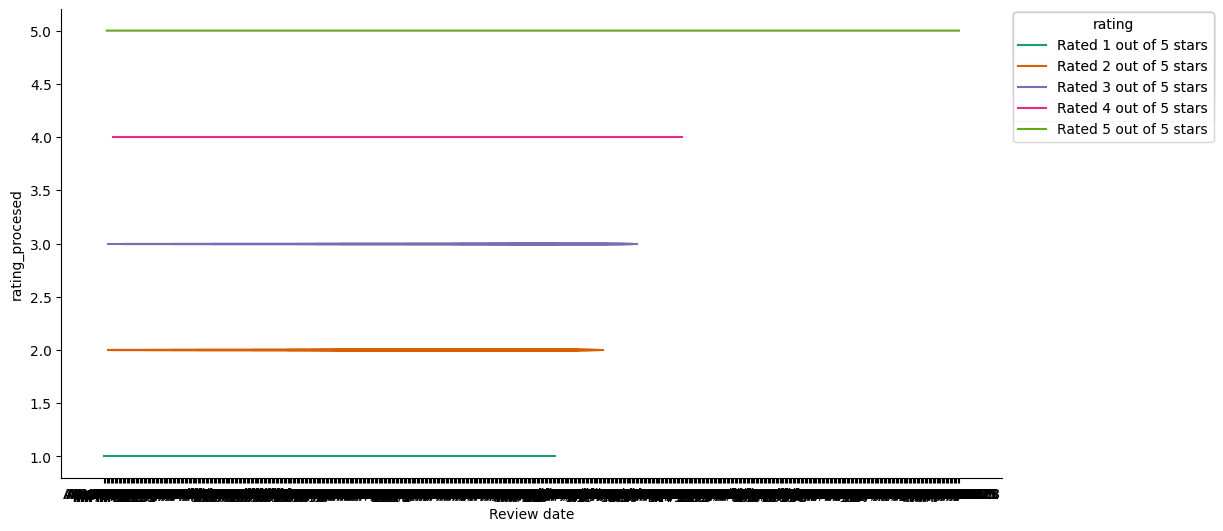

In [330]:
# @title Review date vs rating_procesed

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Review date']
  ys = series['rating_procesed']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Review date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rating')):
  _plot_series(series, series_name, i)
  fig.legend(title='rating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review date')
_ = plt.ylabel('rating_procesed')

In [331]:
df['hierarchical_label'] = human_readable_labels

In [332]:
df.head()

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months,hierarchical_label
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2,Topic_6 -> Subtopic_1
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0,Topic_9 -> Subtopic_0
2,Rated 5 out of 5 stars,Love digital banking,Love digital banking I keep now all my busines...,"Feb 1, 2024","February 01, 2024",5,2024,2024,0,Topic_6 -> Subtopic_0
3,Rated 3 out of 5 stars,Poor support and no wires,"A decent basic free business bank, but have re...","Feb 8, 2024","February 07, 2024",3,2024,2024,0,Topic_9 -> Subtopic_1
4,Rated 4 out of 5 stars,Really easy to set up,Really easy to set up. Works as intended most ...,"Jan 10, 2024","January 10, 2024",4,2024,2024,0,Topic_9 -> Subtopic_1


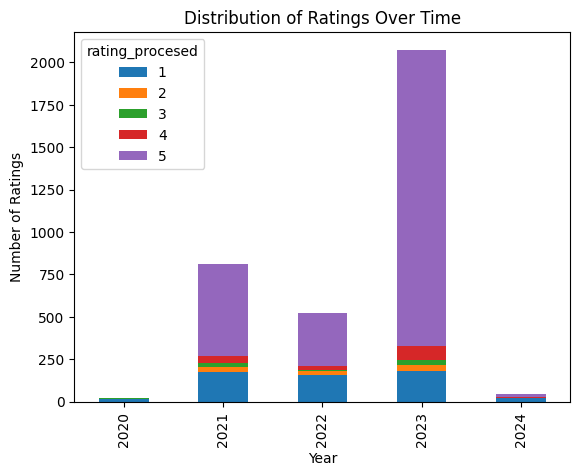

In [333]:
# @title Distribution of Ratings Over Time

import matplotlib.pyplot as plt

# Group the data by year and rating and count the occurrences
rating_distribution = df.groupby(['Year of review ', 'rating_procesed'])['rating_procesed'].count().unstack()

# Plot the stacked bar chart
rating_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
_ = plt.title('Distribution of Ratings Over Time')

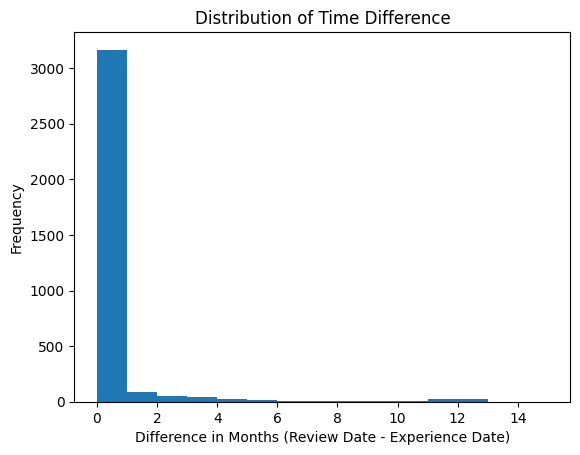

In [334]:
# @title Distribution of Time Difference Between Review and Experience

import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(df['DIff in months '], bins=15)
plt.xlabel('Difference in Months (Review Date - Experience Date)')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Time Difference')

# Model Training

In [335]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['hierarchical_label'])

In [336]:
y

array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0]])

In [337]:
from sklearn.model_selection import train_test_split

X = df['Review text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [338]:
y_train

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 1, 1]])

In [339]:
y_train

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 1, 1]])

In [340]:
# Vectorize the reviews
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review text'])

In [341]:
# Cluster the reviews to create main topics
kmeans_main = KMeans(n_clusters=3, random_state=42)
main_topic_labels = kmeans_main.fit_predict(X)

# Add main topic labels to the DataFrame
df['main_topic'] = main_topic_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [342]:
df.head()

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months,hierarchical_label,main_topic
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2,Topic_6 -> Subtopic_1,1
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0,Topic_9 -> Subtopic_0,0
2,Rated 5 out of 5 stars,Love digital banking,Love digital banking I keep now all my busines...,"Feb 1, 2024","February 01, 2024",5,2024,2024,0,Topic_6 -> Subtopic_0,2
3,Rated 3 out of 5 stars,Poor support and no wires,"A decent basic free business bank, but have re...","Feb 8, 2024","February 07, 2024",3,2024,2024,0,Topic_9 -> Subtopic_1,0
4,Rated 4 out of 5 stars,Really easy to set up,Really easy to set up. Works as intended most ...,"Jan 10, 2024","January 10, 2024",4,2024,2024,0,Topic_9 -> Subtopic_1,0


In [343]:
# Sub-cluster the reviews within each main topic
subtopic_labels = []
for main_topic in df['main_topic'].unique():
    indices = df[df['main_topic'] == main_topic].index
    sub_X = X[indices]

    kmeans_sub = KMeans(n_clusters=2, random_state=42)
    sub_labels = kmeans_sub.fit_predict(sub_X)

    for i, idx in enumerate(indices):
        subtopic_labels.append((idx, sub_labels[i]))

# Sort subtopic labels to match DataFrame order
subtopic_labels = sorted(subtopic_labels, key=lambda x: x[0])
subtopic_labels = [label[1] for label in subtopic_labels]

# Add subtopic labels to the DataFrame
df['sub_topic'] = subtopic_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [352]:
df.head()

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months,hierarchical_label,main_topic,sub_topic,main_topic_label,sub_topic_label
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2,easy -> use -> great -> novo -> app -> easy ->...,1,1,1,"[easy, great, novo, work, super]"
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0,novo -> bank -> account -> business -> service...,0,0,0,"[novo, bank, business, service, customer]"
2,Rated 5 out of 5 stars,Love digital banking,Love digital banking I keep now all my busines...,"Feb 1, 2024","February 01, 2024",5,2024,2024,0,business -> great -> small -> banking -> novo ...,2,1,2,"[business, banking, small, novo, love]"
3,Rated 3 out of 5 stars,Poor support and no wires,"A decent basic free business bank, but have re...","Feb 8, 2024","February 07, 2024",3,2024,2024,0,novo -> bank -> account -> business -> service...,0,0,0,"[novo, bank, business, service, customer]"
4,Rated 4 out of 5 stars,Really easy to set up,Really easy to set up. Works as intended most ...,"Jan 10, 2024","January 10, 2024",4,2024,2024,0,novo -> bank -> account -> business -> service...,0,0,0,"[novo, bank, business, service, customer]"


In [349]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review text'])  # Fit the vectorizer and transform the data

# Function to get top terms for each cluster
def get_top_terms_per_cluster(kmeans, vectorizer, n_terms=5):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    top_terms = {}
    for i in range(kmeans.n_clusters):
        top_terms[i] = [terms[ind] for ind in order_centroids[i, :n_terms]]
    return top_terms

# Cluster the reviews to create main topics
kmeans_main = KMeans(n_clusters=3, random_state=42)
main_topic_labels = kmeans_main.fit_predict(X)

# Get top terms for main topics
main_topic_terms = get_top_terms_per_cluster(kmeans_main, vectorizer)

# Map main topic labels to terms
df['main_topic_label'] = [main_topic_terms[label] for label in main_topic_labels]

# Sub-cluster the reviews within each main topic
subtopic_labels = []
subtopic_terms = {}
for main_topic in df['main_topic_label'].unique():
    indices = df[df['main_topic_label'] == main_topic].index
    sub_X = X[indices]

    kmeans_sub = KMeans(n_clusters=2, random_state=42)
    sub_labels = kmeans_sub.fit_predict(sub_X)

    # Get top terms for subtopics
    sub_topic_terms = get_top_terms_per_cluster(kmeans_sub, vectorizer)
    subtopic_terms[tuple(main_topic)] = sub_topic_terms

    for i, idx in enumerate(indices):
        subtopic_labels.append((idx, sub_labels[i]))

# Sort subtopic labels to match DataFrame order
subtopic_labels = sorted(subtopic_labels, key=lambda x: x[0])
subtopic_labels = [label[1] for label in subtopic_labels]

# Add subtopic labels to the DataFrame
df['sub_topic_label'] = subtopic_labels
df['sub_topic_label'] = df.apply(lambda row: subtopic_terms[tuple(row['main_topic_label'])][row['sub_topic_label']], axis=1)

# Combine main and subtopic labels to create hierarchical labels
df['hierarchical_label'] = df.apply(lambda row: ' -> '.join(row['main_topic_label']) + ' -> ' + ' -> '.join(row['sub_topic_label']), axis=1)

# Display the DataFrame with hierarchical labels
print(df[['review_text', 'hierarchical_label']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TypeError: unhashable type: 'list'

In [351]:
# Function to get top terms for each cluster
def get_top_terms_per_cluster(kmeans, vectorizer, n_terms=5):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    top_terms = {}
    for i in range(kmeans.n_clusters):
        top_terms[i] = [terms[ind] for ind in order_centroids[i, :n_terms]]
    return top_terms

# Cluster the reviews to create main topics
kmeans_main = KMeans(n_clusters=3, random_state=42)
main_topic_labels = kmeans_main.fit_predict(X)

# Get top terms for main topics
main_topic_terms = get_top_terms_per_cluster(kmeans_main, vectorizer)

# Map main topic labels to terms
df['main_topic_label'] = main_topic_labels

# Sub-cluster the reviews within each main topic
subtopic_labels = []
subtopic_terms = {}
for main_topic_label in range(kmeans_main.n_clusters):
    indices = df[df['main_topic_label'] == main_topic_label].index
    sub_X = X[indices]

    if sub_X.shape[0] > 1:  # Proceed only if there's more than one sample to cluster
        kmeans_sub = KMeans(n_clusters=2, random_state=42)
        sub_labels = kmeans_sub.fit_predict(sub_X)

        # Get top terms for subtopics
        sub_topic_terms = get_top_terms_per_cluster(kmeans_sub, vectorizer)
        subtopic_terms[main_topic_label] = sub_topic_terms

        for i, idx in enumerate(indices):
            subtopic_labels.append((idx, sub_labels[i]))
    else:
        subtopic_labels.append((indices[0], 0))  # Assign a single cluster if there's only one sample

# Sort subtopic labels to match DataFrame order
subtopic_labels = sorted(subtopic_labels, key=lambda x: x[0])
subtopic_labels = [label[1] for label in subtopic_labels]

# Add subtopic labels to the DataFrame
df['sub_topic_label'] = subtopic_labels

# Create a mapping for subtopics to terms
df['sub_topic_label'] = df.apply(lambda row: subtopic_terms.get(row['main_topic_label'], {}).get(row['sub_topic_label'], []), axis=1)

# Combine main and subtopic labels to create hierarchical labels
df['hierarchical_label'] = df.apply(lambda row: ' -> '.join(main_topic_terms[row['main_topic_label']]) + ' -> ' + ' -> '.join(row['sub_topic_label']), axis=1)

# Display the DataFrame with hierarchical labels
print(df[['Review text', 'hierarchical_label']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                            Review text  \
0     It was easy to set up, with no hassle like som...   
1     Unfortunately I’m probably going to figure out...   
2     Love digital banking I keep now all my busines...   
3     A decent basic free business bank, but have re...   
4     Really easy to set up. Works as intended most ...   
...                                                 ...   
3467  Terrible customer support. Takes forever to ge...   
3468  I have absolutely nothing good to say about th...   
3469  USE A FINANCIAL INSTITUTION THAT ACTUALLY CARE...   
3470  After 3 months closed my company's account wit...   
3471  Seriously, how can they call themselves a bank...   

                                     hierarchical_label  
0     easy -> use -> great -> novo -> app -> easy ->...  
1     novo -> bank -> account -> business -> service...  
2     business -> great -> small -> banking -> novo ...  
3     novo -> bank -> account -> business -> service...  
4

In [346]:
df.head()

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months,hierarchical_label,main_topic,sub_topic
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2,customer_service -> positive_feedback,1,1
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0,banking -> general,0,0
2,Rated 5 out of 5 stars,Love digital banking,Love digital banking I keep now all my busines...,"Feb 1, 2024","February 01, 2024",5,2024,2024,0,card_services -> credit_card,2,1
3,Rated 3 out of 5 stars,Poor support and no wires,"A decent basic free business bank, but have re...","Feb 8, 2024","February 07, 2024",3,2024,2024,0,banking -> general,0,0
4,Rated 4 out of 5 stars,Really easy to set up,Really easy to set up. Works as intended most ...,"Jan 10, 2024","January 10, 2024",4,2024,2024,0,banking -> general,0,0


In [347]:
# Vectorize the reviews
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review text'])  # Fit the vectorizer and transform the data

# Function to get top terms for each cluster
def get_top_terms_per_cluster(kmeans, vectorizer, n_terms=5):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    top_terms = {}
    for i in range(kmeans.n_clusters):
        top_terms[i] = [terms[ind] for ind in order_centroids[i, :n_terms]]
    return top_terms

# Cluster the reviews to create main topics
kmeans_main = KMeans(n_clusters=3, random_state=42)
main_topic_labels = kmeans_main.fit_predict(X)

# Get top terms for main topics
main_topic_terms = get_top_terms_per_cluster(kmeans_main, vectorizer)

# Map main topic labels to terms
df['main_topic_label'] = [main_topic_terms[label] for label in main_topic_labels]

# Sub-cluster the reviews within each main topic
subtopic_labels = []
subtopic_terms = {}
for main_topic in df['main_topic_label']:
    indices = df[df['main_topic_label'] == main_topic].index
    sub_X = X[indices]

    kmeans_sub = KMeans(n_clusters=2, random_state=42)
    sub_labels = kmeans_sub.fit_predict(sub_X)

    # Get top terms for subtopics
    sub_topic_terms = get_top_terms_per_cluster(kmeans_sub, vectorizer)
    subtopic_terms[tuple(main_topic)] = sub_topic_terms

    for i, idx in enumerate(indices):
        subtopic_labels.append((idx, sub_labels[i]))

# Sort subtopic labels to match DataFrame order
subtopic_labels = sorted(subtopic_labels, key=lambda x: x[0])
subtopic_labels = [label[1] for label in subtopic_labels]

# Add subtopic labels to the DataFrame
df['sub_topic_label'] = subtopic_labels
df['sub_topic_label'] = df.apply(lambda row: subtopic_terms[tuple(row['main_topic_label'])][row['sub_topic_label']], axis=1)

# Combine main and subtopic labels to create hierarchical labels
df['hierarchical_label'] = df.apply(lambda row: ' -> '.join(row['main_topic_label']) + ' -> ' + ' -> '.join(row['sub_topic_label']), axis=1)

# Display the DataFrame with hierarchical labels
print(df[['review_text', 'hierarchical_label']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: ('Lengths must match to compare', (3472,), (5,))

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans



# Vectorize the reviews
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review text'])  # Fit the vectorizer and transform the data

# Function to get top terms for each cluster
def get_top_terms_per_cluster(kmeans, vectorizer, n_terms=5):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    top_terms = {}
    for i in range(kmeans.n_clusters):
        top_terms[i] = [terms[ind] for ind in order_centroids[i, :n_terms]]
    return top_terms

# Cluster the reviews to create main topics
kmeans_main = KMeans(n_clusters=3, random_state=42)
main_topic_labels = kmeans_main.fit_predict(X)

# Get top terms for main topics
main_topic_terms = get_top_terms_per_cluster(kmeans_main, vectorizer)

# Map main topic labels to terms
df['main_topic_label'] = main_topic_labels

# Sub-cluster the reviews within each main topic
subtopic_labels = []
subtopic_terms = {}
for main_topic_label in range(kmeans_main.n_clusters):
    indices = df[df['main_topic_label'] == main_topic_label].index
    sub_X = X[indices]

    if sub_X.shape[0] > 1:  # Proceed only if there's more than one sample to cluster
        kmeans_sub = KMeans(n_clusters=2, random_state=42)
        sub_labels = kmeans_sub.fit_predict(sub_X)

        # Get top terms for subtopics
        sub_topic_terms = get_top_terms_per_cluster(kmeans_sub, vectorizer)
        subtopic_terms[main_topic_label] = sub_topic_terms

        for i, idx in enumerate(indices):
            subtopic_labels.append((idx, sub_labels[i]))
    else:
        subtopic_labels.append((indices[0], 0))  # Assign a single cluster if there's only one sample

# Sort subtopic labels to match DataFrame order
subtopic_labels = sorted(subtopic_labels, key=lambda x: x[0])
subtopic_labels = [label[1] for label in subtopic_labels]

# Add subtopic labels to the DataFrame
df['sub_topic_label'] = subtopic_labels

# Create a mapping for subtopics to terms
df['sub_topic_label'] = df.apply(lambda row: subtopic_terms.get(row['main_topic_label'], {}).get(row['sub_topic_label'], []), axis=1)

# Combine main and subtopic labels to create hierarchical labels
df['hierarchical_label'] = df.apply(lambda row: ' -> '.join(main_topic_terms[row['main_topic_label']]) + ' -> ' + ' -> '.join(row['sub_topic_label']), axis=1)

# Display the DataFrame with hierarchical labels
print(df[['review_text', 'hierarchical_label']])

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['rating title'].value_counts()
    for x_label, grp in _df_20.groupby('rating')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('rating')
_ = plt.ylabel('rating title')

In [ ]:
# prompt: write code to train a model so that it is able to predict the labels from the given review text.write complete code, I want to train it on the df dataset above. Also generate the training and test dataset from the df dataframe. since the task of language modelling use, some language modelling relating technique. There can be multiple labels. So treat it as multi class classification problme

import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare the data
X = df['Review text']
y = df['main_topic_label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

# Train the model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

model = OneVsRestClassifier(LinearSVC())
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


In [353]:
df.head()

,rating,rating title,Review text,Review date,Date of Experience,rating_procesed,Year of review,Year of experience,DIff in months,hierarchical_label,main_topic,sub_topic,main_topic_label,sub_topic_label
0,Rated 5 out of 5 stars,Great bank for businesses,"It was easy to set up, with no hassle like som...","Feb 15, 2024","December 01, 2023",5,2024,2023,2,easy -> use -> great -> novo -> app -> easy ->...,1,1,1,"[easy, great, novo, work, super]"
1,Rated 3 out of 5 stars,Buggy when it matters most.,Unfortunately I’m probably going to figure out...,"Feb 19, 2024","February 18, 2024",3,2024,2024,0,novo -> bank -> account -> business -> service...,0,0,0,"[novo, bank, business, service, customer]"
2,Rated 5 out of 5 stars,Love digital banking,Love digital banking I keep now all my busines...,"Feb 1, 2024","February 01, 2024",5,2024,2024,0,business -> great -> small -> banking -> novo ...,2,1,2,"[business, banking, small, novo, love]"
3,Rated 3 out of 5 stars,Poor support and no wires,"A decent basic free business bank, but have re...","Feb 8, 2024","February 07, 2024",3,2024,2024,0,novo -> bank -> account -> business -> service...,0,0,0,"[novo, bank, business, service, customer]"
4,Rated 4 out of 5 stars,Really easy to set up,Really easy to set up. Works as intended most ...,"Jan 10, 2024","January 10, 2024",4,2024,2024,0,novo -> bank -> account -> business -> service...,0,0,0,"[novo, bank, business, service, customer]"


In [354]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer


# MultiLabelBinarizer to convert hierarchical labels to binary array format
mlb = MultiLabelBinarizer()
y_sub_labels = mlb.fit_transform(df['sub_topic_label'].apply(lambda x: [x]))

# Split the data into training and testing sets
X_train, X_test,y_sub_train, y_sub_test = train_test_split(
    df['Review text'],  y_sub_labels, test_size=0.2, random_state=42)

# Vectorize the review texts
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Train a classifier for sub-topics
sub_topic_clf = LogisticRegression(random_state=42)
sub_topic_clf.fit(X_train_tfidf, y_sub_train)

# Predict on the test set
sub_topic_pred = sub_topic_clf.predict(X_test_tfidf)

# Calculate accuracy
sub_topic_accuracy = accuracy_score(y_sub_test, sub_topic_pred)

print(f"Sub-Topic Accuracy: {sub_topic_accuracy}")

TypeError: unhashable type: 'list'